In [1]:
# Importing necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

In [27]:
data = pd.read_csv('customer_support_tickets.csv')

In [28]:
# Display basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [29]:
# Data Preprocessing
# Handling missing values

In [30]:
data = data.dropna()

# Encoding categorical variables

In [32]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [33]:
# Define features and target variable

In [38]:
X = data.drop(['Ticket ID', 'Customer Satisfaction Rating'], axis=1)
y = data['Customer Satisfaction Rating']

In [39]:
# Splitting the dataset

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [41]:
# Feature Scaling

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [44]:
# Train a Random Forest Classifier

In [45]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
# Predict on the test set

In [47]:
y_pred = rfc.predict(X_test)

In [48]:
# Model Evaluation

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.20577617328519857
Classification Report:
               precision    recall  f1-score   support

         1.0       0.17      0.17      0.17       168
         2.0       0.24      0.22      0.23       174
         3.0       0.24      0.26      0.25       175
         4.0       0.19      0.17      0.18       162
         5.0       0.18      0.20      0.19       152

    accuracy                           0.21       831
   macro avg       0.21      0.20      0.20       831
weighted avg       0.21      0.21      0.21       831

Confusion Matrix:
 [[29 41 38 27 33]
 [42 38 34 27 33]
 [37 23 45 34 36]
 [31 27 36 28 40]
 [27 29 36 29 31]]


In [50]:
# Visualization of Results
# Feature Importance

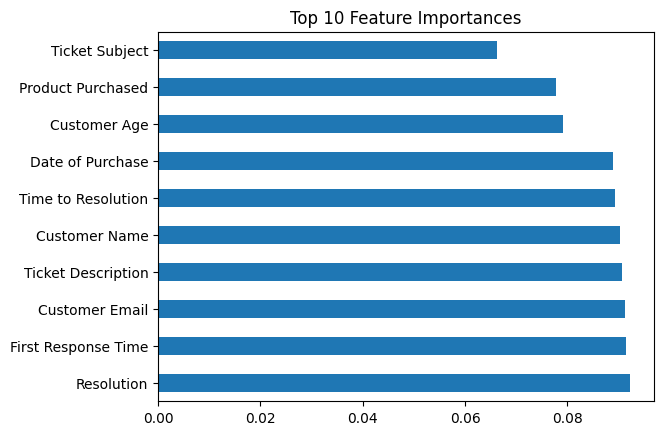

In [51]:
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [58]:
# Load the dataset
data = pd.read_csv("customer_support_tickets.csv")

# Display the first few rows of the dataset

In [60]:
print(data.head())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

# Perform initial exploratory data analysis (EDA)


In [62]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [63]:
# Print column names

In [64]:
print(data.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


# Analyze customer support ticket trends
# Identify common issues

In [66]:
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


# Plotting ticket trends over time

In [70]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()

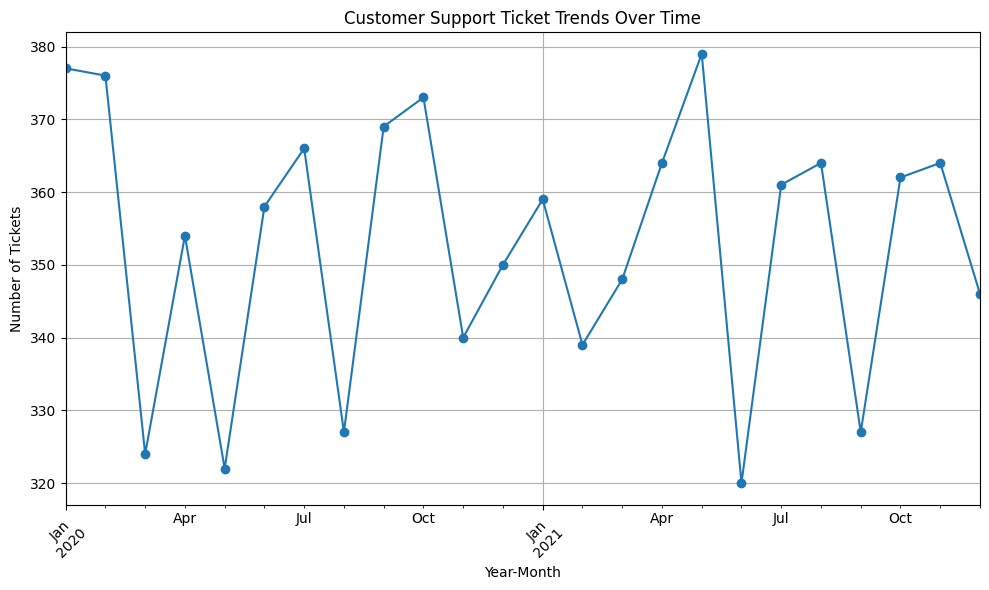

In [71]:
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# Segment customers
# Segment based on ticket types

In [73]:
ticket_type_segmentation = data.groupby('Ticket Type').size()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)


Segmentation based on Ticket Types:
Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64


# Segment based on satisfaction levels

In [76]:
satisfaction_segmentation = data.groupby('Customer Satisfaction Rating').size()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)


Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64


# Set up the plotting aesthetics

In [78]:
sns.set(style="whitegrid")

# Customer Satisfaction Distribution

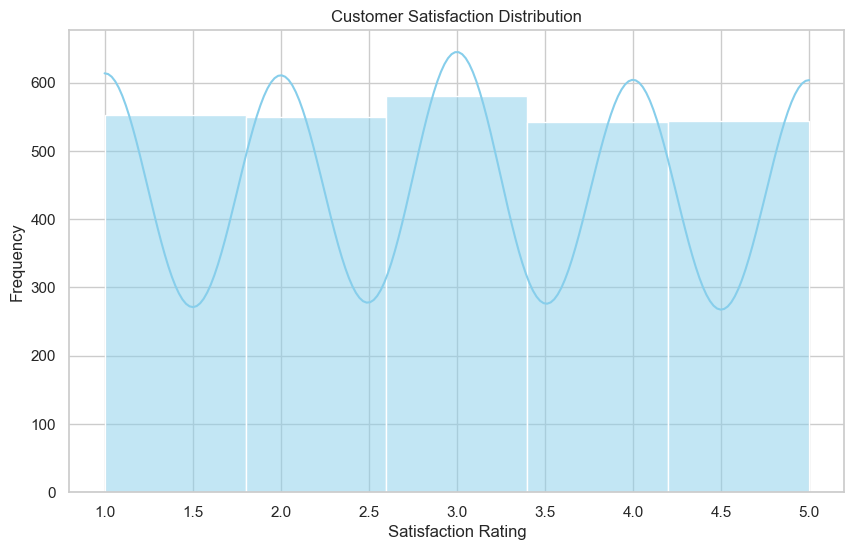

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5,
kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

# Ticket Status Distribution

In [84]:
ticket_status_distribution = data['Ticket Status'].value_counts()

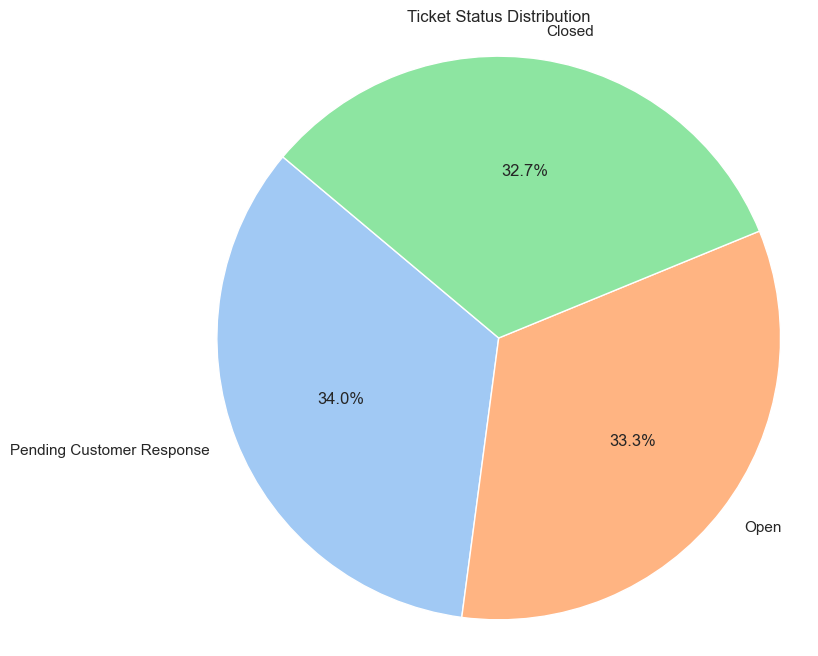

In [85]:
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution,
labels=ticket_status_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

# Customer Age Distributio

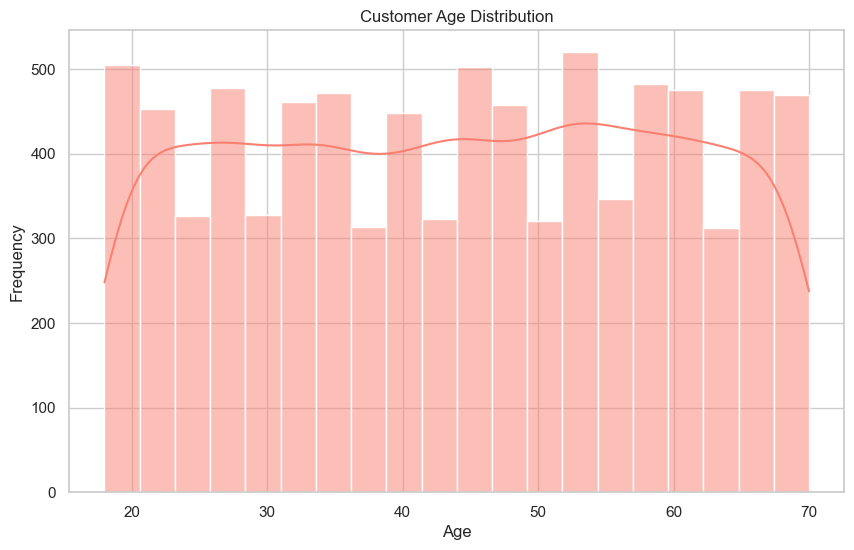

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True,
color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Customer Gender Distribution

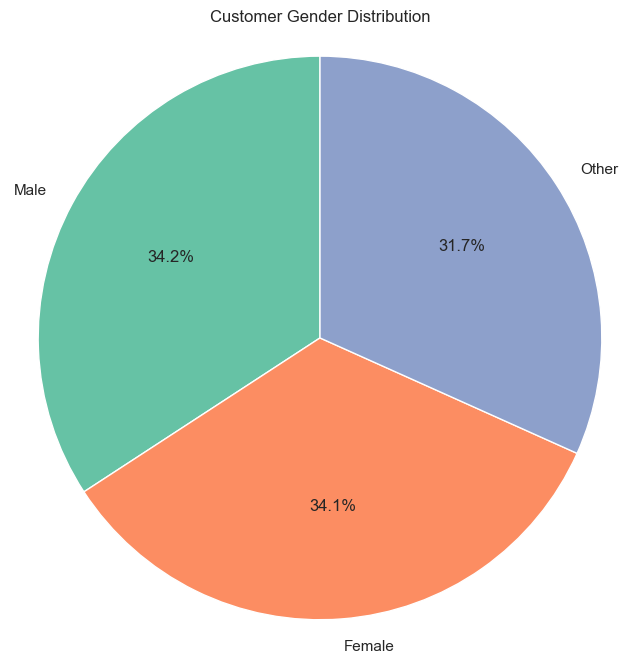

In [90]:
customer_gender_distribution = data['Customer Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(customer_gender_distribution,
labels=customer_gender_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

# Ticket Channel Distribution

C:\Users\deemi\AppData\Local\Temp\ipykernel_10948\2883618483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index,y=ticket_channel_distribution, palette='rocket')


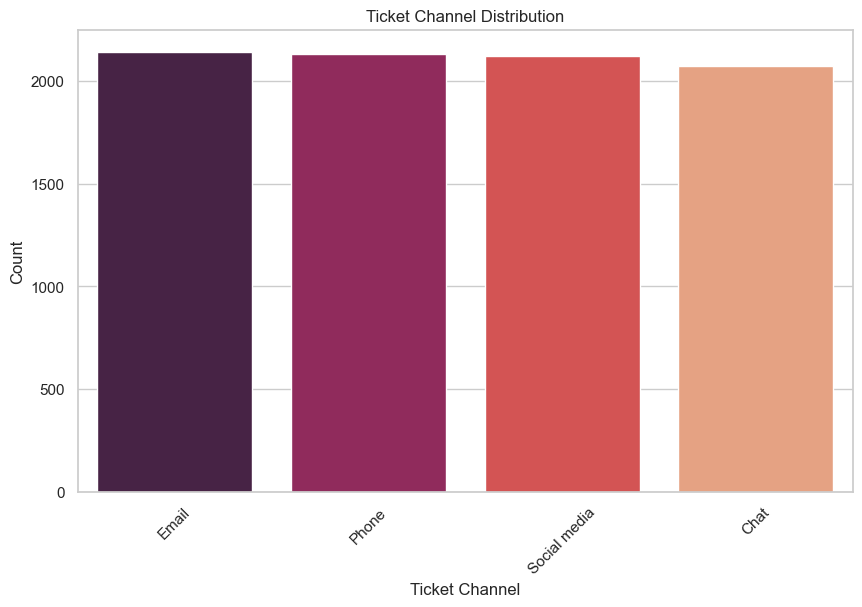

In [92]:
plt.figure(figsize=(10, 6))
ticket_channel_distribution = data['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Chart 1: Average Customer Satisfaction by Gender (Bar Plot)

C:\Users\deemi\AppData\Local\Temp\ipykernel_10948\2717794002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',order=['Male', 'Female', 'Other'])


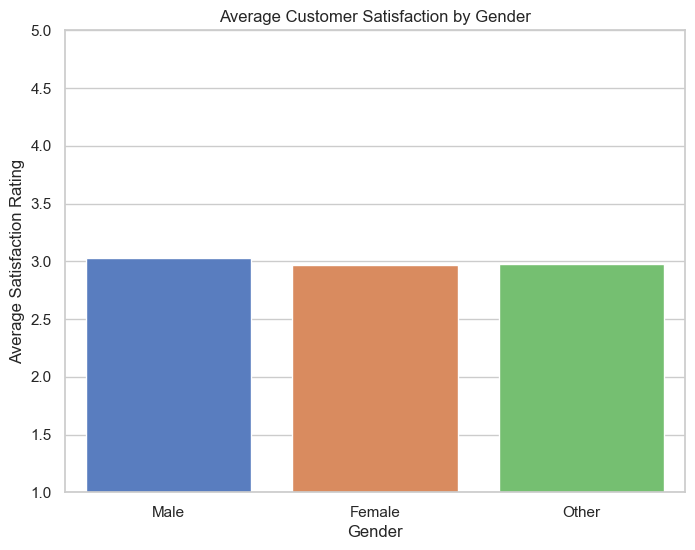

In [99]:
average_satisfaction = data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted',order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5) # Adjust y-axis limit if needed
plt.show()

# Product Purchased Distribution

C:\Users\deemi\AppData\Local\Temp\ipykernel_10948\1502792873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')


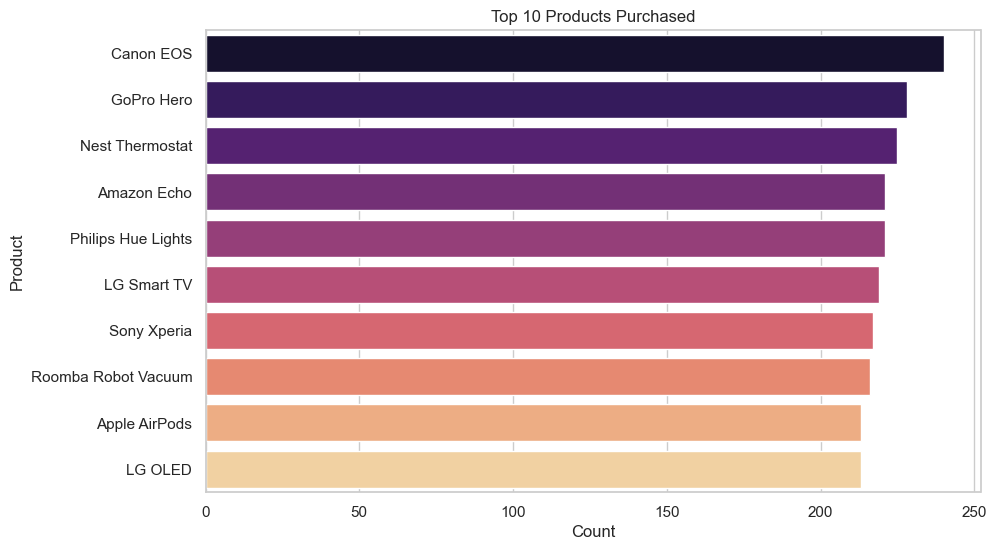

In [102]:
plt.figure(figsize=(10, 6))
product_purchased_distribution = data['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

In [103]:
# Chart 2: Top Items Purchased by Gender (Horizontal Bar Chart)

In [104]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

# Top Items Purchased by Males

Text(0, 0.5, 'Product')

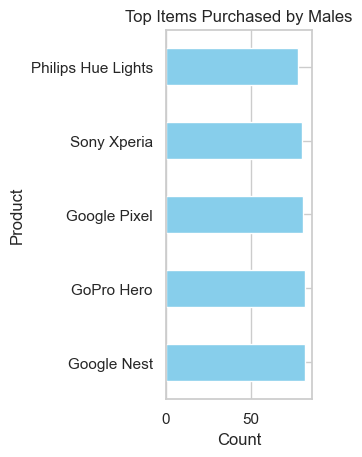

In [106]:
plt.subplot(1, 3, 1)
top_items_male = data[data['Customer Gender'] =='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Females

Text(0, 0.5, 'Product')

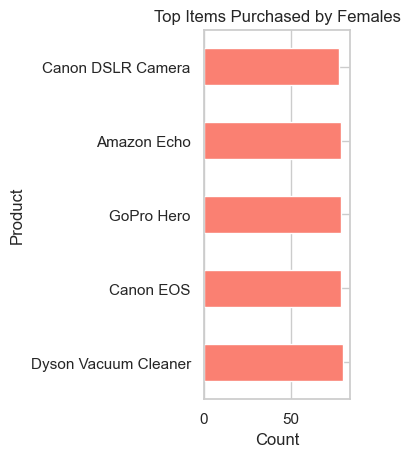

In [108]:
plt.subplot(1, 3, 2)
top_items_female = data[data['Customer Gender'] =='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Other Gender

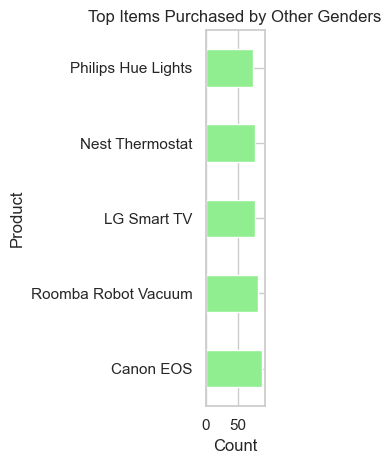

In [110]:
plt.subplot(1, 3, 3)
top_items_other = data[data['Customer Gender'] =='Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# Count ticket types

In [112]:
ticket_type_distribution = data['Ticket Type'].value_counts()

In [113]:
# Plot


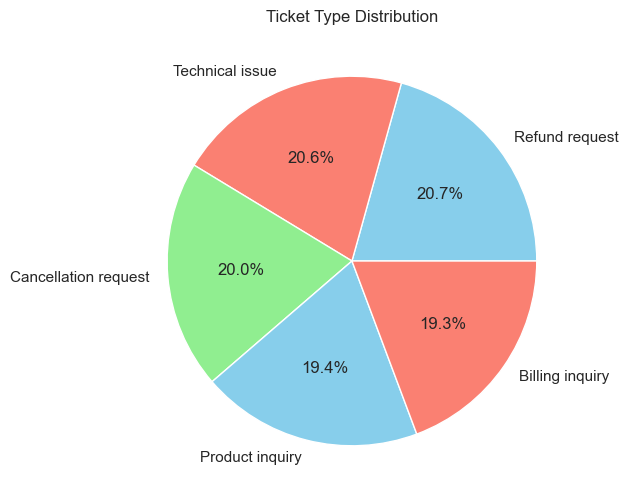

In [114]:
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

# Count ticket priorities

In [116]:
priority_distribution = data['Ticket Priority'].value_counts()

In [117]:
# Plot

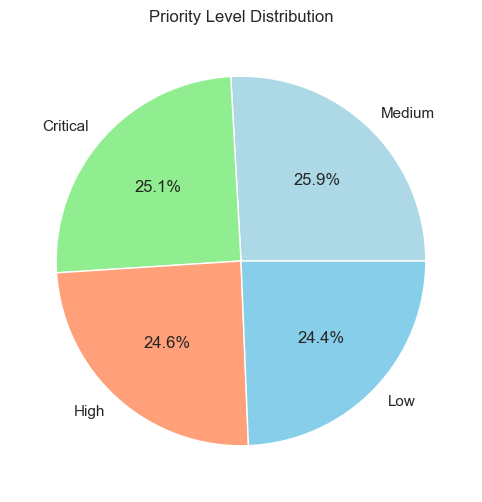

In [118]:
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

# Define age groups

In [120]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90', '91-100']

In [121]:
# Categorize customers into age groups


In [122]:
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins,labels=labels, right=False)

# Calculate number of tickets raised by each age group

In [124]:
tickets_by_age_group = data.groupby('Age Group').size()

C:\Users\deemi\AppData\Local\Temp\ipykernel_10948\137006552.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group = data.groupby('Age Group').size()


In [125]:
# Plot

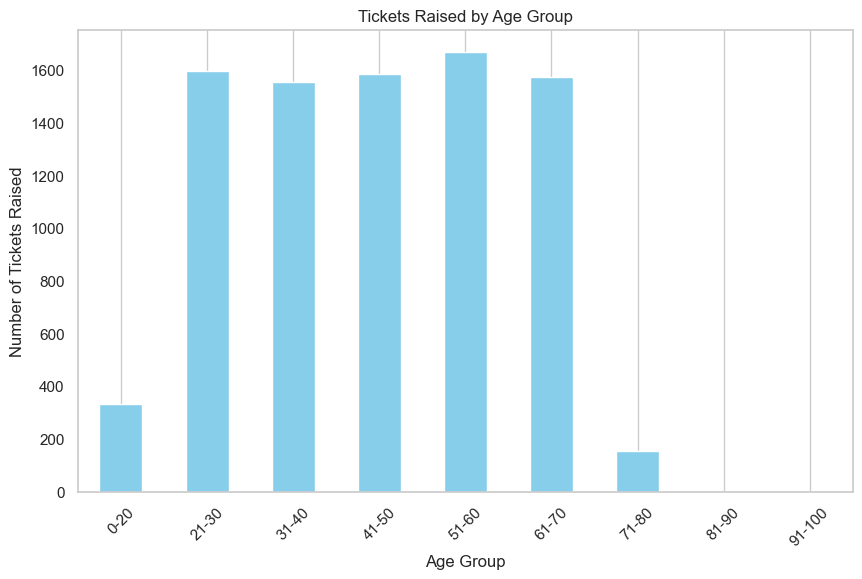

In [126]:
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Replace inf values with NaN

In [128]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [129]:
# Create a facet grid for each ticket type

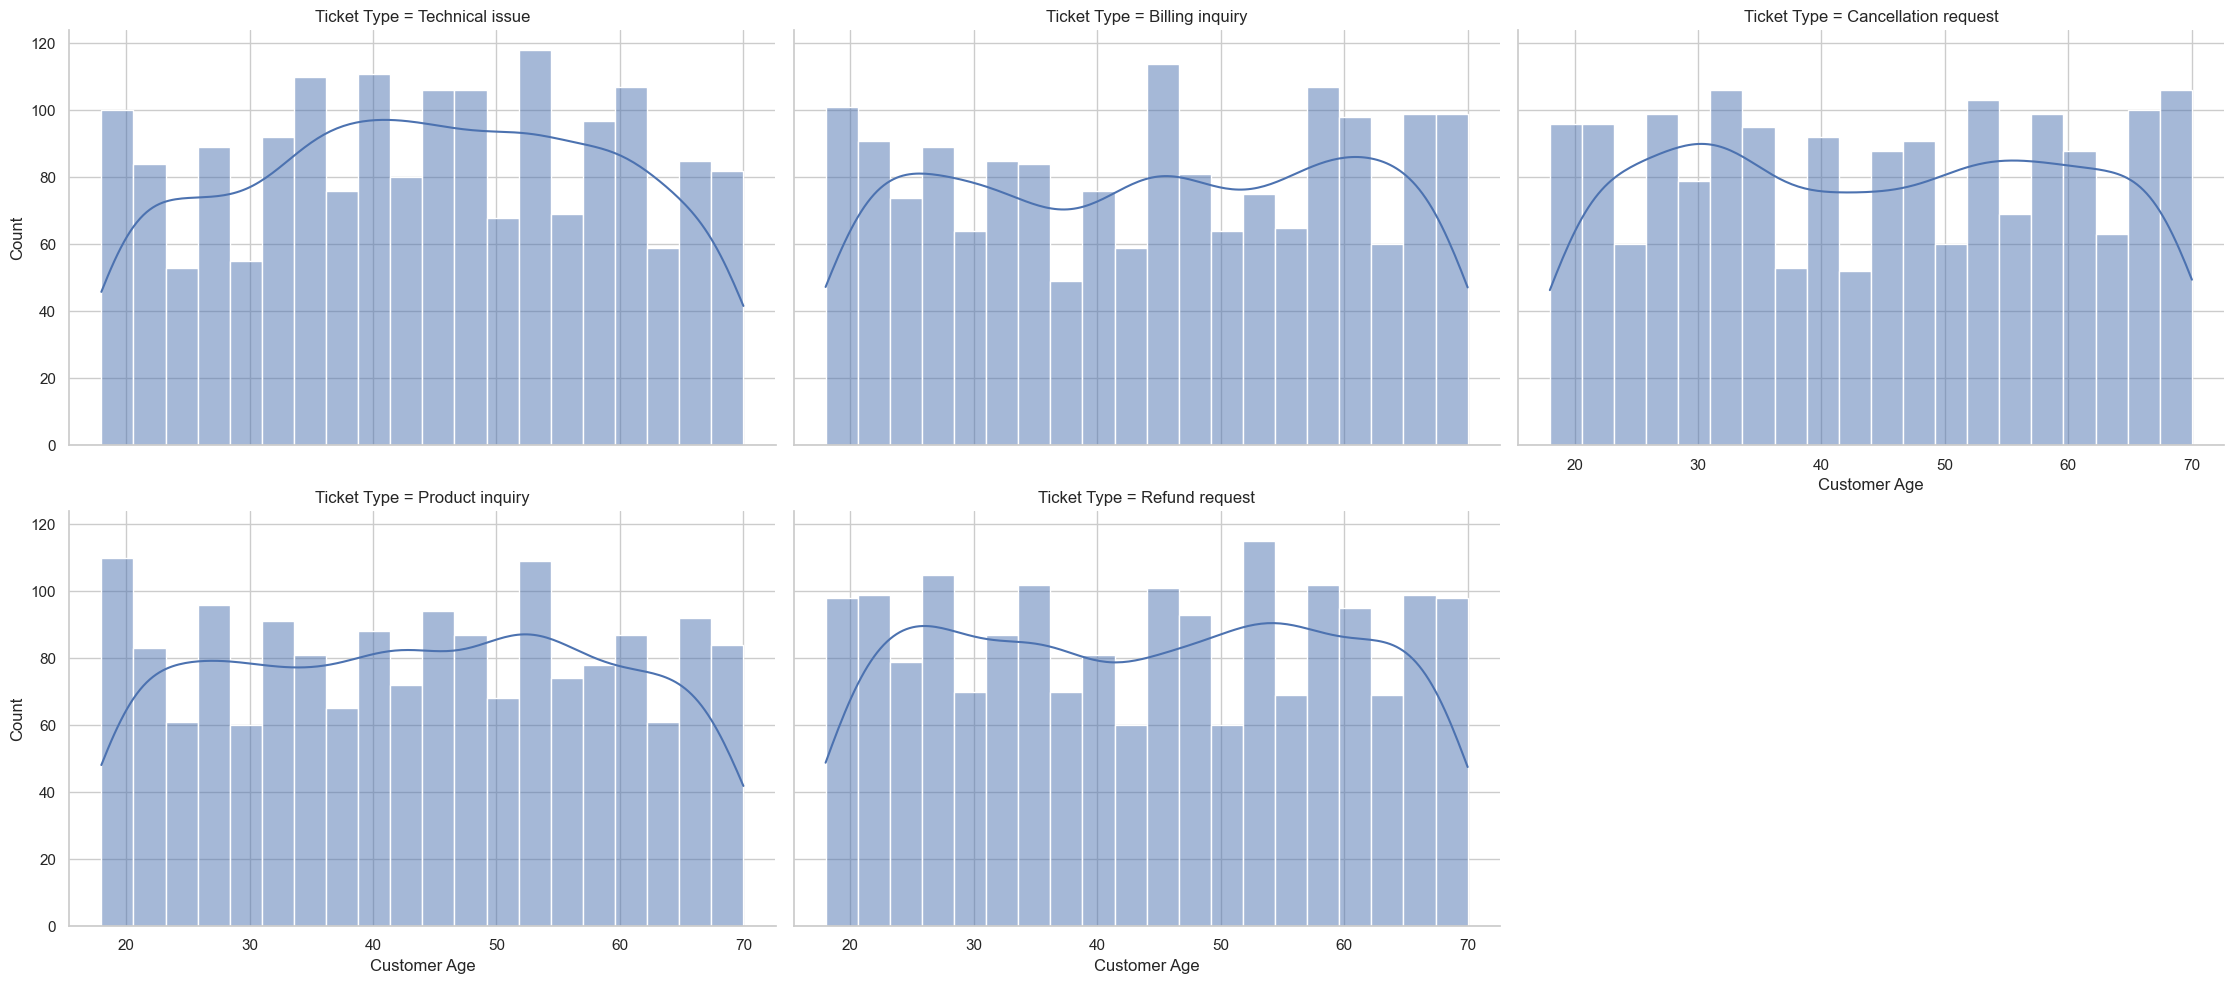

In [130]:
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3,height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)

In [131]:
# Set titles and labels

In [132]:
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')

In [133]:
# Adjust layout

In [134]:
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

# Thank you

# Deepak Mishra